# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [521]:
#set up imports

import pandas as pd
import requests
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [522]:
#Load datafile1 with twitter_archive_enhanced.csv file from local storage

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#convert to pandas.Dataframe
df_archive = pd.DataFrame(twitter_archive)

In [523]:
#checking that file loaded by looking at first 5 rows
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [524]:
# download image_predictions.tsv programatically
# using request library to pull data from url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
# writing the data into a file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file to dataframe image_predictions
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
#convert to pandas.DataFrame
df_image = pd.DataFrame(image_predictions)

# Looking at image_predicitons to see proper format
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [525]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [526]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#       count += 1
#        print(str(count) + ": " + str(tweet_id))
#       try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

2356

In [527]:
#read file line by line and append to df_list from tweet-json.txt file - had issues with API
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [528]:
#create pandas data frame
df_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [529]:
#tweet count
df_count

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [530]:
#save copy to local machine for visual assessment
df_count.to_csv('jsonfile_twitter.csv', encoding = 'utf-8', index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [531]:
#conduct visual assessment
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [532]:
# Programmatic Assessment
#checking cols datatypes and values
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [533]:
#check summary statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [534]:
# number of values for each name
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
an             7
Daisy          7
Bailey         7
Toby           7
Stanley        6
Bella          6
Koda           6
Dave           6
Milo           6
Jax            6
Scout          6
Jack           6
Leo            6
Oscar          6
Rusty          6
very           5
            ... 
Kramer         1
Alexander      1
Suki           1
Karl           1
Ridley         1
Huck           1
Chuck          1
Arya           1
Carll          1
Jiminus        1
Chloe          1
Iroh           1
Pinot          1
Philippe       1
Sora           1
Champ          1
Kaia           1
Mingus         1
Craig          1
Tom            1
Grizz          1
DonDon         1
Randall        1
Blu            1
Malikai        1
Daniel         1
Blipson        1
Timber        

In [535]:
#check for duplicates
df_archive.duplicated().sum()

0

In [536]:
#conduct visual assessment
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [537]:
#Programmatic Assessment
# checking columns for missing values and datatypes
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [538]:
# checking summary statistics
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [539]:
df_image.duplicated().sum()

0

In [540]:
# number of duplicated jpg_url images
df_image.jpg_url.duplicated().sum()

66

In [541]:
#conduct visual assessment
df_count

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [542]:
# checking columns for missing values and datatypes
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [543]:
# checking statistical data
df_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [544]:
df_count.id_str.duplicated().sum()

0

### Quality issues
1. df_archive: remove retweet rpws & columns retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id,     retweeted_status_user_id, retweeted_status_timestamp.

2. df_archive: change timestamp datatype to datetime  

3. df_archive: change tweet_id column to dtype string

4. df_archive: remove columns with missing values in columns and unnecessary columns

5. df_image: make all dog breed names lower case in p1, p2, p3 for consistency

6. df_image: change tweet_id column to dtype string

7. df_count: change column name from id_str to tweet_id

8. df_archive: capitalize all pet names

### Tidiness issues
1. df_achive columns doggo, floofer, pupper, puppo should be merged into one column

2. merge all three tables to one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [545]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_count_clean = df_count.copy()

### Quality Issues

### Issue #1:

df_archive_clean remove retweet rows & columns retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id,     retweeted_status_user_id, retweeted_status_timestamp

#### Define:
Find the retweets and replies by using the retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp and remove them from the dataframe as they will not be used for analysis

#### Code
remove retweet rows and columns

In [546]:
#removing the rows that consists of retweets
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_timestamp.isnull()]

In [547]:
#checking that retweet rows are removed
df_archive_clean[df_archive_clean['text']!= 'RT@'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Test

In [548]:
#rows and columns removed
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Removed retweet rows and columns: retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp 

### Issue #2:

#### Define
In df_archive_clean, change datatype for timestamp from object(str) to datetime

#### Code
utilize the pd.to_ method to change 'timestamp' to datetime

In [549]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [550]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### timestamp changed to datetime datatype

### Issue #3:

#### Define
df_archive: twitter_id column is currently an int64 change dtype to 'string'

#### Code
utilize the astype function to change 'tweet_id to string datatype

In [551]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype('str')

#### Test

In [552]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

#### changed tweet_id from int64 to object(string)

### Issue #4

#### Define
df_archive: remove columns with missing values in columns


#### Code
utilize dropna method on df_archive to remvoe columns with missing values

In [553]:
df_archive_clean.dropna(axis=1, how='any', inplace=True) 

#### Test

In [554]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


##### removed column 'expanded_url' due to missing value, df_archive_clean reduced from 12 columns to 11 columns

### Issue #5

#### Define
df_image_clean: all dog breed names should be lower case in columns p1, p2, and p3

#### Code
utilize lower() method to change all column names to lower case

In [555]:
df_image_clean['p1'] = df_image_clean['p1'].str.lower()
df_image_clean['p2'] = df_image_clean['p2'].str.lower()
df_image_clean['p3'] = df_image_clean['p3'].str.lower()

#### Test

In [556]:
df_image_clean.p1.head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [557]:
df_image_clean.p2.head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [558]:
df_image_clean.p3.head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

##### columns p1, p2, p3 have been updated to all lower case names for the dogs

### Issue #6

#### Define
df_image_clean: change tweet_id column to datatype string

#### Code
utilize .astype() method to change datatype

In [559]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

#### Test

In [560]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### tweet_id changed from int to object(string)

### Issue #7

#### Define
df_count_clean: change column name id_str to tweet_id

#### Code
utilize rename to change column name

In [561]:
df_count_clean.rename(index=str, columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [562]:
df_count_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


##### column name id_str changed to tweet_id

### Issue #8

#### Define
df_archive_clean: not all dog names are not capitalized

#### Code
df_archive_clean: utilize capitalize method to capitalize all pet names

In [563]:
df_archive_clean['name'] = df_archive_clean['name'].str.capitalize()

#### Test

In [564]:
df_archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          Such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326       Quite
2327           A
2328        None
2329        None
2330        None
2331        None
2332        None
2333          An
2334           A
2335          An
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         The
2346         The
2347           A
2348           A
2349          An
2350           A
2351        None
2352           A
2353          

#### df_archive_clean column name have all been capitlized

## Tidiness issues

### Issue #1

#### Define
Combine dog nickname columns to one column

#### Code
use the melt method to combine the 4 columns into one.

In [565]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [566]:
#list of columns in df_archive_clean
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [567]:
#creating melted columns assinging doggo, floofter, pupper, and puppo to one column under dog 
df_archive_clean = pd.melt(df_archive_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_types')

In [568]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 9 columns):
tweet_id              8700 non-null object
timestamp             8700 non-null datetime64[ns]
source                8700 non-null object
text                  8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  8700 non-null object
dog                   8700 non-null object
dog_types             8700 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 611.8+ KB


In [569]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog,dog_types
7501,725458796924002305,2016-04-27 22:57:10,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,13,10,None,puppo,None
3835,675891555769696257,2015-12-13 04:14:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,6,10,Donny,floofer,None
8062,680206703334408192,2015-12-25 02:01:30,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,12,10,Toby,puppo,None
8369,671896809300709376,2015-12-02 03:40:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,10,10,Lola,puppo,None
7567,714606013974974464,2016-03-29 00:12:05,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,12,10,None,puppo,None


In [570]:
df_archive_clean = df_archive_clean.drop('dog', axis = 1)

In [571]:
df_archive_clean = df_archive_clean.sort_values('dog_types').drop_duplicates('tweet_id', keep ='last')

In [572]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_types             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


In [573]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types
3433,697242256848379904,2016-02-10 02:14:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,10,10,Oakley,None
3910,674330906434379776,2015-12-08 20:53:11,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,13,10,None,None
5562,700143752053182464,2016-02-18 02:24:13,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,10,10,None,pupper
4564,845306882940190720,2017-03-24 16:10:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,12,10,Pickles,pupper
3124,729838605770891264,2016-05-10 01:00:58,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",12,10,None,None


In [574]:
df_archive_clean.dog_types.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_types, dtype: int64

#### Test

In [593]:
#seeing visual representation of updated data
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types
2772,780858289093574656,2016-09-27 19:54:58,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",10,10,Dash,None
6186,672205392827572224,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,9,10,Opal,pupper
2323,859074603037188101,2017-05-01 15:58:40,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,13,10,None,None
5742,687704180304273409,2016-01-14 18:33:48,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,9,10,Blakely,pupper
3215,714957620017307648,2016-03-29 23:29:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,10,10,Curtis,None
2319,859924526012018688,2017-05-04 00:15:58,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,12,10,Milky,None
2081,667546741521195010,2015-11-20 03:35:20,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,9,10,George,None
4087,670783437142401025,2015-11-29 01:56:48,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,1,10,None,None
2070,667861340749471744,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,9,10,A,None
2993,748575535303884801,2016-06-30 17:54:50,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,6,10,One,None


In [594]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_types             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


### Issue #2

#### Define
merge tables

#### Code
use merge method to join two tables

In [576]:
df_merge = df_archive_clean.join(df_image_clean.set_index('tweet_id'), on= 'tweet_id')

#### Test

In [577]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 19 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_types             2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(12)
mem

#### two tables joined

In [578]:
df_master = df_merge.join(df_count_clean.set_index('tweet_id'), on='tweet_id')

In [579]:
#drop rows with a missing value
df_master1 = df_master.dropna()

#### Test

In [580]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2095 to 7298
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_types             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         1994 non-null int64
favorite_count       

#### All three tables are joined

In [581]:
#visual examination
df_master1

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2095,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,...,0.980815,False,drake,6.917770e-03,False,hen,5.255170e-03,False,620,833
2094,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,...,0.825670,True,french_bulldog,5.663940e-02,True,staffordshire_bullterrier,5.401840e-02,True,96,327
2093,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,...,0.676376,True,irish_terrier,5.493340e-02,True,yorkshire_terrier,4.057550e-02,True,66,203
2092,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,11,10,A,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,...,0.304175,True,pug,2.234270e-01,True,lakeland_terrier,7.331650e-02,True,102,273
2091,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,...,0.852088,True,ice_bear,1.322640e-01,False,weasel,5.729980e-03,False,242,559
2090,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,...,0.143957,True,christmas_stocking,1.186510e-01,False,ski_mask,9.248170e-02,False,294,565
2089,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,11,10,Hall,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,...,0.996709,True,golden_retriever,1.688210e-03,True,beagle,7.116670e-04,True,231,563
2088,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,12,10,None,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,...,0.636169,True,labrador_retriever,1.192560e-01,True,golden_retriever,8.254920e-02,True,2272,7148
2087,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1.0,...,0.125176,True,standard_poodle,8.457150e-02,True,cocker_spaniel,8.134690e-02,True,203,389
2086,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,12,10,None,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1.0,...,0.447893,False,dhole,9.243530e-02,False,chesapeake_bay_retriever,8.812240e-02,True,1198,1798


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [582]:
df_master1.to_csv(path_or_buf='twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [583]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2095 to 7298
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_types             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         1994 non-null int64
favorite_count       

### Insights:
1. What are the top 5 dog names with the most favorites?

2. Which dog name has the highest rating?

3. Which dog breed had the higheset rating?

### Visualization

#### What are the top 5 dog names with the most favorites

In [584]:
#display the top 5 dog names with highest avg favorite count
#first limit list to just dogs eliminating all other none K-9 animals.  P1 statistic is the highes probablility of an actual dog
dog = df_master1[df_master1['p1_dog']==True]
dogname = dog.groupby(['name'], as_index=True)['favorite_count'].mean().nlargest(5, keep= 'first')
dogname

name
Duddles    107956.0
Stephan    107015.0
Jamesy     106827.0
Lilly       73397.0
Aja         71144.0
Name: favorite_count, dtype: float64

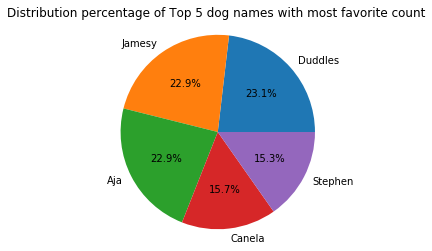

In [585]:
#plotting results in pie chart
labels = ['Duddles', 'Jamesy', 'Aja', 'Canela', 'Stephen']
plt.pie(dogname, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution percentage of Top 5 dog names with most favorite count')
plt.axis('equal');

#### Duddles is the dog name with greatest number of favorites holding 23.1% of the top 5 names, followed closely by Jamesy.  This is created utilizing groupby name column and then averaging the favorite count for each name.  The data is then visualized using a pie chart displaying only the top five names as this would have been a very large data set to display.

#### Which dog name has the highest rating

In [586]:
#determine names with highest rating average and order top 20 largest
# use dog df to just have df of dogs
name_ranking = dog.groupby(['name'], as_index = True)['rating_numerator'].mean().nlargest(10, keep='first')
name_ranking

name
Logan       75.0
Bluebert    50.0
Sam         24.0
Sophie      15.0
Cermet      14.0
Doobert     14.0
Emmy        14.0
Kuyu        14.0
Ollie       14.0
Smiley      14.0
Name: rating_numerator, dtype: float64

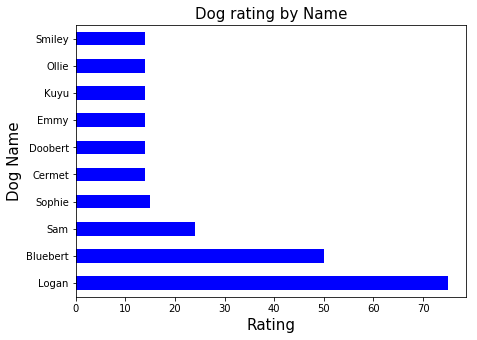

In [587]:
#plot with bar chart
plt.figure(figsize = (7,5))
name_ranking.plot(kind='barh', color='blue')
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Dog Name', fontsize=15)
plt.title('Dog rating by Name', fontsize=15);


####   Logan is the dog name with the highest rating.  This was created utilizing the groupby on the name column of df_master1 dataframe and averaging the rating numerator for each name.  The chart is then producted for a visual effect.  

#### Which dog breed had the higheset rating

In [588]:
#create new table removing all p1_dog columns that equaled False for easier determination of actual dogs and their rating
dog_breed = df_master1[df_master1['p1_dog']==True]
dog_breed

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2094,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,...,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True,96,327
2093,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,...,0.676376,True,irish_terrier,0.054933,True,yorkshire_terrier,0.040576,True,66,203
2092,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,11,10,A,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,...,0.304175,True,pug,0.223427,True,lakeland_terrier,0.073316,True,102,273
2091,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,...,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,242,559
2090,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,...,0.143957,True,christmas_stocking,0.118651,False,ski_mask,0.092482,False,294,565
2089,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,11,10,Hall,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,...,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True,231,563
2088,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,12,10,None,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,...,0.636169,True,labrador_retriever,0.119256,True,golden_retriever,0.082549,True,2272,7148
2087,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1.0,...,0.125176,True,standard_poodle,0.084572,True,cocker_spaniel,0.081347,True,203,389
2085,667530908589760512,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,10,10,Naphaniel,None,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1.0,...,0.633037,True,kuvasz,0.146391,True,labrador_retriever,0.046184,True,264,501
2084,667534815156183040,2015-11-20 02:47:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",8,10,Frank,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1.0,...,0.435254,True,cardigan,0.307407,True,cocker_spaniel,0.033158,True,576,866


In [589]:
#with new table set up groupby on p1 col with best statistical chance, and detrmining the average of the rating numerator on each breed of dog, keeping the top 20 largest values
best_dog_breed = dog_breed.groupby(['p1'], as_index=True)['rating_numerator'].mean().nlargest(20, keep='first')
best_dog_breed

p1
clumber                        27.000000
soft-coated_wheaten_terrier    25.454545
west_highland_white_terrier    15.642857
great_pyrenees                 14.928571
borzoi                         14.444444
labrador_retriever             13.905263
siberian_husky                 13.250000
golden_retriever               13.208633
pomeranian                     12.868421
saluki                         12.500000
briard                         12.333333
tibetan_mastiff                12.250000
border_terrier                 12.142857
kuvasz                         12.062500
giant_schnauzer                12.000000
silky_terrier                  12.000000
standard_schnauzer             12.000000
eskimo_dog                     11.777778
gordon_setter                  11.750000
irish_setter                   11.750000
Name: rating_numerator, dtype: float64

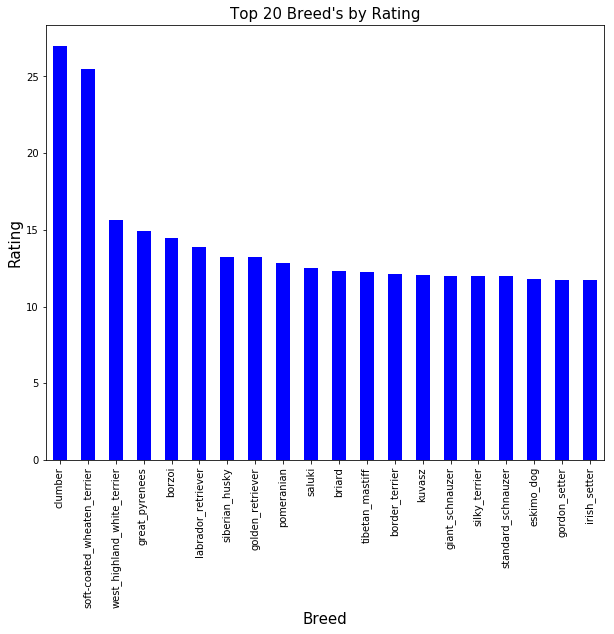

In [590]:
#create bar graph depiciting the 20 highest rated average number of each dog breed rating
plt.figure(figsize = (10,8))
best_dog_breed.plot(kind='bar', color='blue')
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.title('Top 20 Breed\'s by Rating', fontsize=15);


#### This graph shows the name clumber being the average rating for the top 20 breeds, clumber breed has an average rating of 27

In [591]:
df_master1.timestamp.max()

Timestamp('2017-08-01 16:23:56')

In [592]:
df_master1.timestamp.min()

Timestamp('2015-11-15 22:32:08')